In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
import seaborn as sns

Compiling complete dataframe

In [2]:
df_rf = pd.read_csv("df_isopul_lsa.csv")

In [3]:
df_rf

,index,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,...,sweet,tar,tea,tobacco,tree,tropical,vanilla,violet,woody,X..Isopulegol
0,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
1,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
2,3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
3,6,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,7,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,...,0,1,0,0,0,0,1,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,42965,0.360708,-0.269375,0.169135,0.099257,0.141142,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
49996,42968,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
49997,42969,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0
49998,42970,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0.0


In [4]:
df_rf.columns.to_list()

['index',
 'lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'wood

Splitting dependent and independent variables

In [5]:
X = df_rf.drop(['index', 'X..Isopulegol'], axis = 1)
y = df_rf[['X..Isopulegol']]

Plotting histograms on target variable

In [6]:
y_array = y.to_numpy()
y_array

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

<Axes: ylabel='Count'>

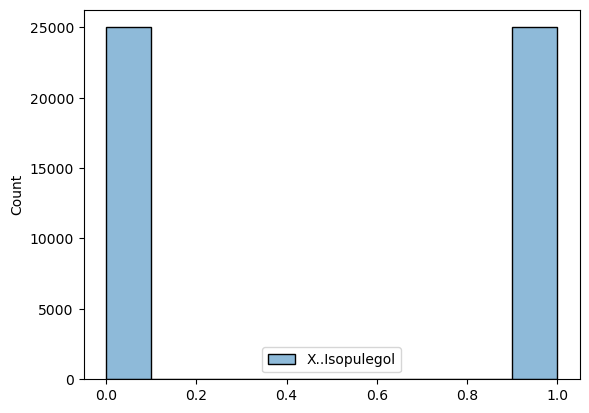

In [7]:
sns.histplot(y, bins = 10)

Train test split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [9]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [10]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3997/119766249.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


RandomForestRegressor(n_jobs=-1)

In [11]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [12]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02205743166184277

In [13]:
mean_squared_error(y_val, y_pred_rfreg)

0.005482627738447913

In [14]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07404476847453785

In [15]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9918282937303541

In [16]:
#val
r2_score(y_val, y_pred_rfreg)

0.9780691021851708

Residual plots for each target variable

Feature Selection

In [17]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [18]:
df_feat

,features,score
0,lsa_0,0.087061
1,lsa_1,0.080814
2,lsa_2,0.100146
3,lsa_3,0.084599
4,lsa_4,0.081989
...,...,...
81,tree,0.000964
82,tropical,0.002431
83,vanilla,0.002033
84,violet,0.000162


In [19]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [20]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
5,hybrid,0.296976
2,lsa_2,0.100146
0,lsa_0,0.087061
3,lsa_3,0.084599
4,lsa_4,0.081989
1,lsa_1,0.080814
50,diesel,0.019626
64,orange,0.015257
45,cheese,0.013125
58,lemon,0.012270


In [21]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/feature_selection/_from_model.py:357: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator_.fit(X, y, **fit_params)


In [22]:
selector.estimator_.feature_importances_

array([8.83165855e-02, 8.46394890e-02, 1.01812573e-01, 8.16095586e-02,
       8.08276349e-02, 2.96812314e-01, 0.00000000e+00, 0.00000000e+00,
       2.30033100e-05, 2.18983016e-03, 1.00911231e-02, 0.00000000e+00,
       4.59731757e-03, 4.61656189e-05, 4.13617078e-03, 4.52681234e-03,
       5.08863401e-03, 7.35580795e-03, 0.00000000e+00, 5.40202710e-03,
       0.00000000e+00, 0.00000000e+00, 5.25284189e-03, 7.84555649e-03,
       7.12577252e-03, 2.66197011e-03, 4.43515819e-03, 2.71267131e-05,
       0.00000000e+00, 2.22861980e-03, 1.04026082e-02, 0.00000000e+00,
       4.97968339e-03, 0.00000000e+00, 0.00000000e+00, 6.61903997e-03,
       4.37344040e-03, 4.46873491e-03, 1.43465024e-04, 2.59972475e-04,
       4.35681061e-04, 6.12129853e-03, 1.29640271e-04, 4.20166283e-03,
       2.15981398e-04, 1.31214284e-02, 1.28058314e-03, 2.85612013e-04,
       7.20271485e-03, 2.09437331e-04, 1.96433918e-02, 6.28338950e-03,
       1.22027703e-02, 1.17280841e-03, 7.29676208e-03, 1.51028013e-03,
      

In [23]:
selector.threshold_

0.01162790697674419

In [24]:
mask = selector.get_support()

In [25]:
mask

array([ True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True, False,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [26]:
selected_features = X.columns[mask]

In [27]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,cheese,diesel,flowery,lemon,orange
0,0.243491,0.034313,0.080290,-0.165609,0.019773,1,1,0,0,0,0
1,0.243491,0.034313,0.080290,-0.165609,0.019773,1,1,0,0,0,0
2,0.243491,0.034313,0.080290,-0.165609,0.019773,1,1,0,0,0,0
3,0.276418,-0.133986,0.116293,0.073694,0.041143,1,0,0,0,0,0
4,0.401841,-0.062527,-0.018128,-0.104475,0.009215,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
49995,0.360708,-0.269375,0.169135,0.099257,0.141142,0,0,0,0,0,0
49996,0.107417,-0.105614,-0.117669,-0.047306,0.055133,0,0,0,0,0,0
49997,0.109738,-0.066611,-0.064934,0.145920,-0.069040,0,0,0,0,0,0
49998,0.440634,-0.078839,0.085152,0.087878,-0.133604,0,0,0,0,0,0


Train test split (after Feature Selection)

In [28]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow_isopul.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow_isopul.pkl")

['selected_X_rf_lsa_elbow_isopul.pkl']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [30]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [31]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3997/3758305.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg.fit(X_train1, y_train1)


In [32]:
mean_absolute_error(y_val, y_pred_rfreg)

0.023026542654295597

In [33]:
mean_squared_error(y_val, y_pred_rfreg)

0.0071934514634623276

In [34]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.08481421734274465

In [35]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9860116161925745

In [36]:
#val
r2_score(y_val, y_pred_rfreg)

0.9712259765425983

Hyperparameter Tuning

In [37]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [38]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [39]:
rscv.fit(X_train1, y_train1)

/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/louispandu/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_valida

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [40]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [41]:
joblib.dump(rscv, "rscv_rf_lsa_elbow_isopul.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params_isopul.pkl")

['rscv_rf_lsa_elbow_best_params_isopul.pkl']

RF (after Hyperparameter Tuning)

In [42]:
rfreg_ht = RandomForestRegressor(n_estimators = 500, min_samples_split = 2, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

/var/folders/ns/m5pnr0211w91v02hpv22958m0000gn/T/ipykernel_3997/2121118255.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfreg_ht.fit(X_train1, y_train1)


In [43]:
mean_absolute_error(y_val, y_pred_rfreg)

0.02230006946800364

In [44]:
mean_squared_error(y_val, y_pred_rfreg)

0.006053326235755318

In [45]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.07780312484569832

In [46]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.9867216313289273

In [47]:
#val
r2_score(y_val, y_pred_rfreg)

0.9757865119424753

Residual plots after Hyperparameter Tuning

Predicting model on the test set

In [48]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [49]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow_isopul.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow_isopul.pkl")

['y_test_rfreg_lsa_elbow_isopul.pkl']

In [50]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.020853330053179752

In [51]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.005075960986327629

In [52]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.07124577872637529

In [53]:
r2_score(y_test, y_pred_rfreg_test)

0.9796920611619022

Error analysis

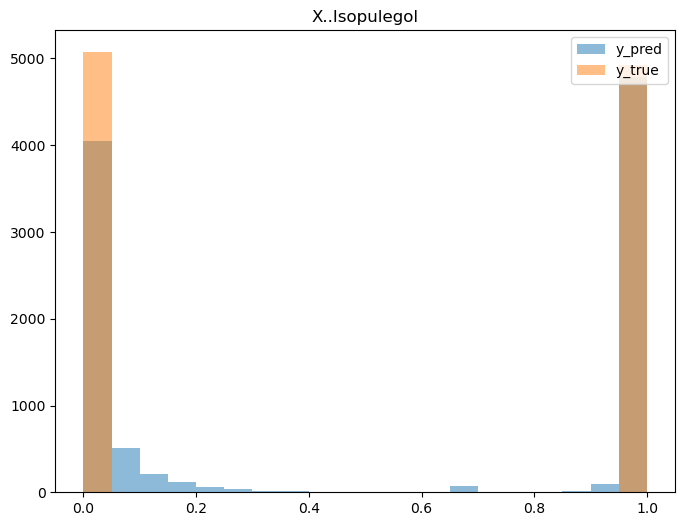

<Figure size 640x480 with 0 Axes>

In [54]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, ax = plt.subplots(figsize=(8, 6))

column = "X..Isopulegol"  # specify the target variable name
ax.hist(y_pred_rfreg_test, alpha=0.5, label='y_pred', bins=20)
ax.hist(y_test[column], alpha=0.5, label='y_true', bins=20)
ax.legend(loc='upper right')
ax.set_title(column)

plt.show()
plt.savefig('error_hist_rf_lsa_elbow_isopul.png')

Pearson R

In [55]:
corr_coef, p_value = pearsonr(y_pred_rfreg_test.flatten(), y_test.values.ravel())

print(f"Pearson correlation coefficient: {corr_coef:.3f}")
print(f"P-value: {p_value:.3f}")

Pearson correlation coefficient: 0.991
P-value: 0.000


<Axes: >

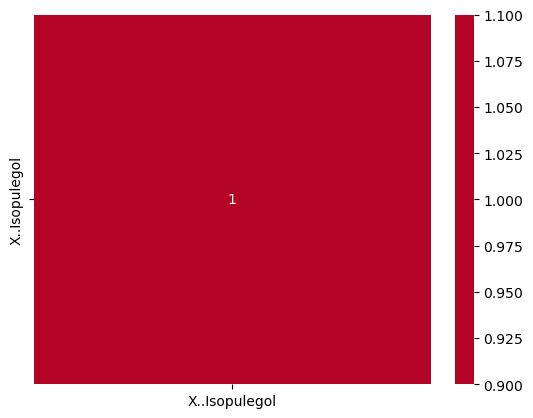

In [56]:
corr_matrix = y_test.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)